In [6]:
import pandas as pd
from sqlalchemy import create_engine
import os

DATABASE_URL = os.getenv("DATABASE_URL")

engine = create_engine(DATABASE_URL)


In [7]:
df_daily = pd.read_sql("SELECT * FROM public.revenue_daily", engine)
df_seller = pd.read_sql("SELECT * FROM public.revenue_by_seller", engine)

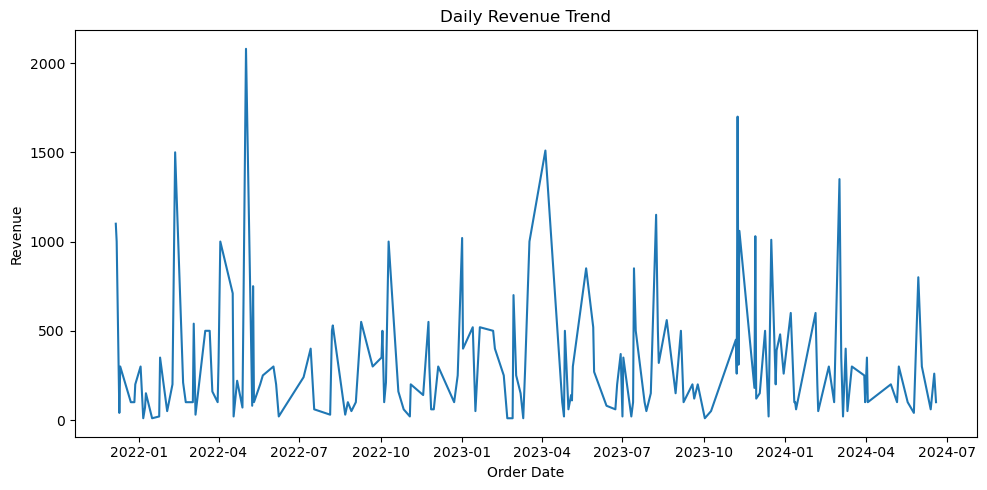

In [8]:
import matplotlib.pyplot as plt

# Aseguramos tipo fecha
df_daily["order_date"] = pd.to_datetime(df_daily["order_date"])

# Ordenamos por fecha (MUY importante)
df_daily = df_daily.sort_values("order_date")

plt.figure(figsize=(10, 5))
plt.plot(df_daily["order_date"], df_daily["daily_revenue"])
plt.title("Daily Revenue Trend")
plt.xlabel("Order Date")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()